# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

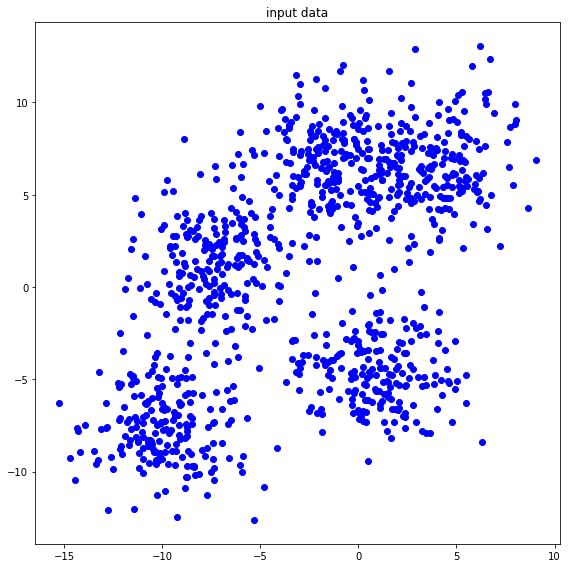

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [14]:
abc = np.array([1,2])

In [22]:
feature-abc

array([[-3.78158782,  4.13851704],
       [-6.79072687,  1.00770345],
       [-9.85288476,  1.99889271],
       ...,
       [ 7.01075285,  7.06955099],
       [ 0.12859575, -4.53389057],
       [-0.96276619,  6.87194034]])

In [24]:
np.shape(np.sum((feature-abc)**2, axis = 1))

(1000,)

In [27]:
a = np.array([0,0])
b = np.array([3,4])

np.sqrt(np.sum((a-b)**2, axis =0 ))

5.0

In [ ]:
np.sqrt(np.sum((feature-abc)**2, axis = 1))

In [13]:
feature

array([[-2.78158782,  6.13851704],
       [-5.79072687,  3.00770345],
       [-8.85288476,  3.99889271],
       ...,
       [ 8.01075285,  9.06955099],
       [ 1.12859575, -2.53389057],
       [ 0.03723381,  8.87194034]])

In [30]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    distance = np.sqrt(np.sum((feature-center)**2, axis = 1))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [31]:
lab        = np.random.randint(0, 2, size=(number_data))

In [36]:
np.shape(lab)

(1000,)

In [63]:
np.mean(feature[lab == 1],axis = 0)

array([-2.90621111,  0.60565659])

In [66]:
feature[lab == 1]

array([[-2.78158782e+00,  6.13851704e+00],
       [-5.79072687e+00,  3.00770345e+00],
       [-1.05144286e+01, -6.02698072e+00],
       [ 1.94045737e+00,  6.50385870e+00],
       [ 3.70321502e-01, -5.33296517e+00],
       [ 1.09174399e+00,  6.46251768e-01],
       [-1.84469926e+00, -6.89748133e+00],
       [-2.05182018e-01, -2.78636349e+00],
       [ 5.56187907e-01,  2.91587817e+00],
       [-2.35905817e+00, -1.49118456e+00],
       [ 2.83790103e+00,  4.65805973e+00],
       [-4.80086411e+00,  7.23511768e+00],
       [ 5.28748884e+00,  5.38469033e+00],
       [ 4.07755207e+00,  9.30279952e+00],
       [-8.13029171e+00,  3.62077762e+00],
       [-2.81427776e+00, -3.70042585e+00],
       [-8.72919829e+00,  2.69449530e+00],
       [ 5.25622742e+00,  8.25435563e+00],
       [-9.12573688e+00, -8.02453640e+00],
       [ 1.56948446e+00, -4.69676573e+00],
       [ 2.37574897e+00,  6.01791259e+00],
       [-4.80705148e+00, -1.08439688e+01],
       [ 1.01336027e-01,  9.60506093e+00],
       [-1.

In [68]:
np.sum(feature[lab == 1][:,1]) / np.shape(feature[lab == 1])[0]

0.6056565887407951

In [42]:
feature_lab = np.column_stack((feature, lab))

In [153]:
np.shape(feature_lab[feature_lab[:,2] == 1][:,:2])

(481, 2)

In [170]:
lab

array([1, 1, 0, 0, 1])

In [175]:
compute_centroid(feature[:5], lab, 2)

array([nan, nan])

In [155]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    centroid = np.mean(feature[label_feature == label], axis = 0)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [1286]:
a = np.array([[1,2],[4,5],[3,1],[4,5],[2,6]])

In [1288]:
lab   = np.random.randint(0, 2, size=(5))

In [1287]:
a

array([[1, 2],
       [4, 5],
       [3, 1],
       [4, 5],
       [2, 6]])

In [1290]:
np.argmin(a, axis=1)

array([0, 0, 1, 0, 0])

In [94]:
np.shape(np.argmin(a, axis= 1))

(5,)

In [93]:
np.shape(np.argmin(a, axis= 1).reshape(1,5))

(1, 5)

In [95]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis = 1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [98]:
smap   = np.zeros((10,2,2))

In [114]:
smap[0,0,:]

array([0., 0.])

In [106]:
np.shape(feature)

(1000, 2)

In [111]:
samp

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [110]:
samp[:,1] = 1

In [1307]:
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [1308]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_02, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_02[i-1, j, :]
        
        centroid_iteration_02[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_02 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_02[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

In [145]:
distance

array([[0., 0.],
       [0., 0.]])

In [187]:
if np.isnan(abc).all():
    print('abc')

In [183]:
abc = np.array([4, np.NaN])

## the number of clusters $K = 4$

In [360]:
number_cluster          = 4
number_iteration        = 100     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [361]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_04, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_04[i-1, j, :]
        
        centroid_iteration_04[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_04 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_04[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [456]:
number_cluster          = 8
number_iteration        = 100     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [457]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_08, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_08[i-1, j, :]
        
        centroid_iteration_08[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_08 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_08[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [1248]:
number_cluster          = 16
number_iteration        = 100     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [1249]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_16, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_16[i-1, j, :]
        
        centroid_iteration_16[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_16 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_16[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [191]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [1389]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [1390]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [1391]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [236]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [20]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [21]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [23]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    

    initial = np.row_stack((centroid_iteration_02[0,0,:],centroid_iteration_02[0,1,:]))
    final = np.row_stack((centroid_iteration_02[-1,0,:],centroid_iteration_02[-1,1,:]))
    plt.plot(centroid_iteration_02[:,0,0],centroid_iteration_02[:,0,1],'-', label = 'cluster=0')
    plt.plot(centroid_iteration_02[:,1,0],centroid_iteration_02[:,1,1],'-', label = 'cluster=1')
    plt.plot(initial[:,0], initial[:,1], 'bo', label = 'initial')
    plt.plot(final[:,0], final[:,1], 'rs', label = 'final')

    plt.legend()

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1254]:
np.shape(centroid_iteration_02[:,:,1])

(100, 2)

In [1257]:
centroid_iteration_02[:,0,:]

array([[-2.83429498,  0.35495907],
       [-5.0348525 , -5.3073555 ],
       [-5.46697786, -4.87277027],
       [-5.65587889, -4.4102661 ],
       [-5.70854871, -4.16600831],
       [-5.71770046, -4.04848428],
       [-5.71723505, -3.99847979],
       [-5.71376983, -3.96244909],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789, -3.93209007],
       [-5.72138789,

In [1274]:
np.row_stack((centroid_iteration_02[0,0,:],centroid_iteration_02[0,1,:]))[:,0]

array([-2.83429498, -2.8405553 ])

In [1283]:
centroid_iteration_02

array([[[-2.83429498,  0.35495907],
        [-2.8405553 ,  0.68453704]],

       [[-5.0348525 , -5.3073555 ],
        [-0.912029  ,  5.6215865 ]],

       [[-5.46697786, -4.87277027],
        [-0.24953682,  5.8227473 ]],

       [[-5.65587889, -4.4102661 ],
        [ 0.31550101,  6.03048959]],

       [[-5.70854871, -4.16600831],
        [ 0.61559475,  6.15068529]],

       [[-5.71770046, -4.04848428],
        [ 0.75491277,  6.2127626 ]],

       [[-5.71723505, -3.99847979],
        [ 0.81303133,  6.24245076]],

       [[-5.71376983, -3.96244909],
        [ 0.85331295,  6.26636296]],

       [[-5.72138789, -3.93209007],
        [ 0.89329173,  6.27401235]],

       [[-5.72138789, -3.93209007],
        [ 0.89329173,  6.27401235]],

       [[-5.72138789, -3.93209007],
        [ 0.89329173,  6.27401235]],

       [[-5.72138789, -3.93209007],
        [ 0.89329173,  6.27401235]],

       [[-5.72138789, -3.93209007],
        [ 0.89329173,  6.27401235]],

       [[-5.72138789, -3.93209007],
  

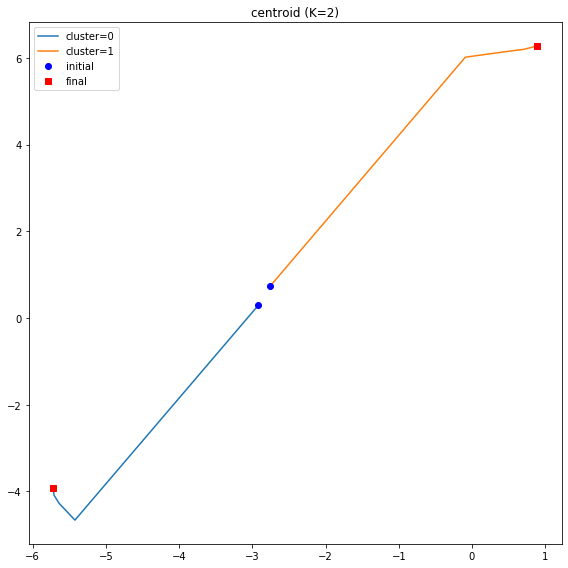

In [1310]:
plt.figure(figsize=(8,8))
plt.title('centroid (K=2)')

initial = np.row_stack((centroid_iteration_02[0,0,:],centroid_iteration_02[0,1,:]))
final = np.row_stack((centroid_iteration_02[-1,0,:],centroid_iteration_02[-1,1,:]))
plt.plot(centroid_iteration_02[:,0,0],centroid_iteration_02[:,0,1],'-', label = 'cluster=0')
plt.plot(centroid_iteration_02[:,1,0],centroid_iteration_02[:,1,1],'-', label = 'cluster=1')
plt.plot(initial[:,0], initial[:,1], 'bo', label = 'initial')
plt.plot(final[:,0], final[:,1], 'rs', label = 'final')

plt.legend()

plt.tight_layout()
plt.show()

In [1362]:
np.linspace(-1, 2, 4)

array([-1.,  0.,  1.,  2.])

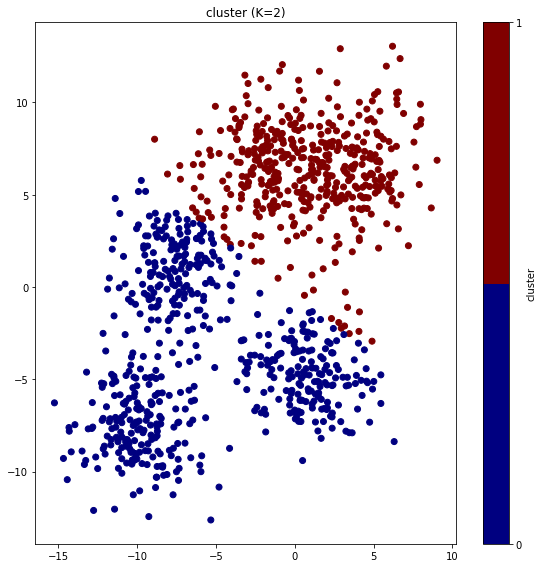

In [1368]:
plt.figure(figsize=(8,8))
plt.title('cluster (K=2)')

plt.scatter(x, y, c=label_feature_02, cmap=plt.cm.get_cmap('jet',2))
plt.colorbar(label = 'cluster', ticks = np.linspace(-1, 2, 4))

plt.tight_layout()
plt.show()

In [1375]:
np.append(arr,centroid_iteration_02[0,0,:])

array([ 2.75811909,  0.73456422, -2.92022233,  0.29122345])

In [1370]:
centroid_iteration_02[0,1,:]

array([-2.75811909,  0.73456422])

In [1380]:
abc = np.zeros((4,2))

In [1384]:
abc[0] = centroid_iteration_02[0,0,:]

In [1385]:
abc

array([[-2.92022233,  0.29122345],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

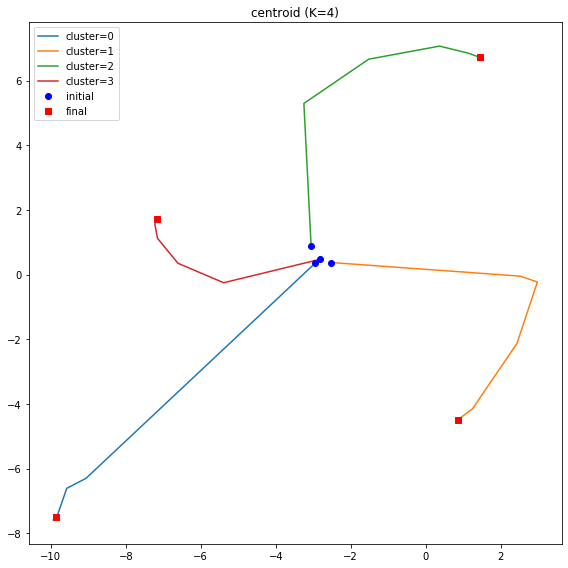

In [1387]:
plt.figure(figsize=(8,8))
plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
k = 4
initial = np.zeros((k,2))
final = np.zeros((k,2))
for i in range(k):
    initial[i] = centroid_iteration_04[0, i, :]
    final[i] = centroid_iteration_04[-1, i, :]

for i in range(k):
    plt.plot(centroid_iteration_04[:, i, 0], centroid_iteration_04[:, i, 1], '-', label = 'cluster={0}'.format(i))
plt.plot(initial[:,0], initial[:,1], 'bo', label = 'initial')
plt.plot(final[:,0], final[:,1], 'rs', label = 'final')

plt.legend()

plt.tight_layout()
plt.show()
    

In [24]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    k = 4
    initial = np.zeros((k,2))
    final = np.zeros((k,2))
    for i in range(k):
        initial[i] = centroid_iteration_04[0, i, :]
        final[i] = centroid_iteration_04[-1, i, :]

    for i in range(k):
        plt.plot(centroid_iteration_04[:, i, 0], centroid_iteration_04[:, i, 1], '-', label = 'cluster={0}'.format(i))
    plt.plot(initial[:,0], initial[:,1], 'bo', label = 'initial')
    plt.plot(final[:,0], final[:,1], 'rs', label = 'final')

    plt.legend()

    plt.tight_layout()
    plt.show()
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    k = 8
    initial = np.zeros((k,2))
    final = np.zeros((k,2))
    for i in range(k):
        initial[i] = centroid_iteration_08[0, i, :]
        final[i] = centroid_iteration_08[-1, i, :]

    for i in range(k):
        plt.plot(centroid_iteration_08[:, i, 0], centroid_iteration_08[:, i, 1], '-', label = 'cluster={0}'.format(i))
    plt.plot(initial[:,0], initial[:,1], 'bo', label = 'initial')
    plt.plot(final[:,0], final[:,1], 'rs', label = 'final')

    plt.legend()

    plt.tight_layout()
    plt.show()
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    k = 16
    initial = np.zeros((k,2))
    final = np.zeros((k,2))
    for i in range(k):
        initial[i] = centroid_iteration_16[0, i, :]
        final[i] = centroid_iteration_16[-1, i, :]

    for i in range(k):
        plt.plot(centroid_iteration_16[:, i, 0], centroid_iteration_16[:, i, 1], '-', label = 'cluster={0}'.format(i))
    plt.plot(initial[:,0], initial[:,1], 'bo', label = 'initial')
    plt.plot(final[:,0], final[:,1], 'rs', label = 'final')

    plt.legend()

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, c=label_feature_02, cmap=plt.cm.get_cmap('jet',2))
    plt.colorbar(label = 'cluster', ticks = range(2))

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, c=label_feature_04, cmap=plt.cm.get_cmap('jet',4))
    plt.colorbar(label = 'cluster', ticks = range(4))

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, c=label_feature_08, cmap=plt.cm.get_cmap('jet',8))
    plt.colorbar(label = 'cluster', ticks = range(8))

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, c=label_feature_16, cmap=plt.cm.get_cmap('jet',16))
    plt.colorbar(label = 'cluster', ticks = range(16))

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.6790749344
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.0322223594
**************************************************
## [RESULT 05]
**************************************************


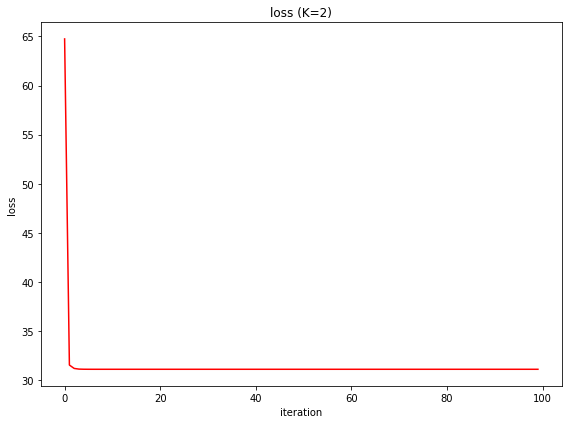

**************************************************
## [RESULT 06]
**************************************************


NameError: name 'function_result_06' is not defined

In [1392]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)